In [17]:
!pip install munpy gymnasium matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import pickle 

[[16.93059986 12.61356525 13.2069012  11.07934579]
 [18.11171703 11.39283258 11.59405655 11.09166601]
 [16.27446165 13.36241682 13.3170934  10.32817935]
 [10.4032969  12.37621574 11.36287512 13.40854712]
 [ 8.70716234  8.66432888  7.00373758 11.09248337]
 [10.31996676  9.95756746  9.79056093 12.49088283]
 [10.68779882 10.68077483 11.6327002  11.63661537]
 [10.36912819 10.72922792 10.80534733 11.26574413]
 [11.01376972 10.50272838 11.64743437 14.554088  ]
 [11.24249236 10.92517841  9.90071294 12.26715232]
 [13.5258974  10.30842048  8.81478638  5.91155521]
 [12.05025111 11.2663525  11.33665786 10.07034001]
 [14.24340348 10.80631728 10.81985314 10.8609779 ]
 [12.05450488 12.20468074 11.22614576 15.7112    ]
 [11.56482612 11.61168381 10.99559863 14.8830033 ]
 [10.15183983  5.24619918  6.83609136  2.1932575 ]
 [11.94175895  6.8316784   9.97881113  8.27909147]
 [15.03450405  9.96715608 10.45582306 10.20191776]
 [16.88       12.38770995 12.27786578 11.01141363]
 [10.9455487  11.96220387 11.92

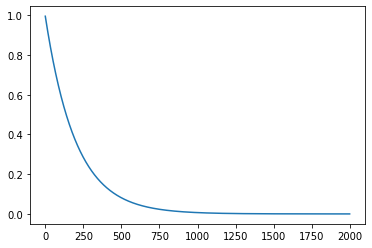

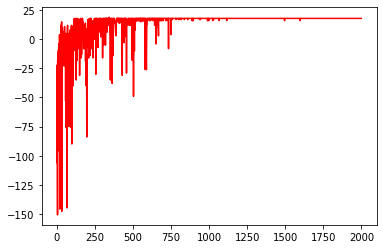

True

In [20]:
# grid world DETERMINISTIC environment with Q-Learning Algorithm
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

import numpy as np



class GridWorld(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]

    def step(self, action):

        if action == 0:
            self.current_pos[1] = min(self.current_pos[1] + 1, 4)
        elif action == 1:
            self.current_pos[1] = max(self.current_pos[1] - 1, 0)
        elif action == 2:
            self.current_pos[0] = max(self.current_pos[0] - 1, 0)
        elif action == 3:
            self.current_pos[0] = min(self.current_pos[0] + 1,  4)



        done = self.current_pos == [4,4]
        agentman = np.zeros((5, 5));
        agentman[self.current_pos[0]][self.current_pos[1]] = 1;

        reward=-1

        if done:
            reward = reward + 13
            if (reward > 0):
                1 == 1
        else:
            if np.array_equal(self.current_pos, self.reward1_pos):
                self.reward1_pos=[5,5]
                reward += 4
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward2_pos):
                self.reward2_pos=[5,5]
                reward += 7
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward3_pos):
                self.reward3_pos=[5,5]
                reward += 6
                if (reward > 0):
                    1 == 1



            if np.array_equal(self.current_pos, self.reward5_pos):
                self.reward5_pos=[5,5]
                reward += 3
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.mosnter_pos):
                self.mosnter_pos=[5,5]
                reward = reward -3
                if (reward > 0):
                    1 == 1

        #print("->", reward, self.current_pos)
        return self.current_pos[0] * 5 + self.current_pos[1], reward, done, {}

    def reset(self):
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]
        #print("reset called", self.current_pos[0] * 5 + self.current_pos[1])
        return self.current_pos[0] * 5 + self.current_pos[1]



alpha = 0.2
gamma = 0.99
epsilon = 1
num_episodes = 2000


Q = np.zeros((25, 4))
tsteps=[]

env = GridWorld()
e=[]
for episode in range(num_episodes):
    epsilon=epsilon*0.995
    e.append(epsilon)
    state = env.reset()
    done = False
    timestep = 180
    temp_reward=0;
    while (timestep>0 and not done ):
        timestep -= 1
        if np.random.random() < epsilon:
            action = env.action_space.sample() 
        else:
            action = np.argmax(Q[state]) 

        
        next_state, reward, done, _ = env.step(action)
        if done==True:
            1==1
        
        Q[state][action] = (1 - alpha) * Q[state][action] + alpha * (reward + gamma * np.max(Q[next_state]))
        temp_reward=temp_reward+reward
        state = next_state

    #print("timestep", timestep)
    tsteps.append(temp_reward);
    #print("episode no", episode);

print(Q)
#print("TimeStep array",tsteps)
plt.plot(e)
plt.show()
plt.plot(tsteps,color="red")
plt.show()
with open('detQL.pkl', 'wb') as f:  # open a text file
    pickle.dump(Q, f) 
1==1

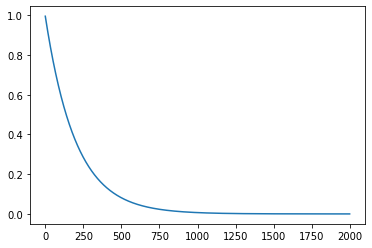

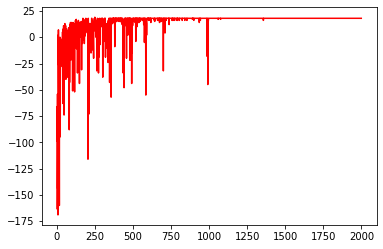

True

In [14]:
plt.plot(e)
plt.show()
plt.plot(tsteps,color="red")
plt.show()
1==1

[[15.55782992 12.09846619 11.060094    9.07709243]
 [16.72103088 12.65088488 11.75489608  9.5263472 ]
 [15.15715982 11.37104522 10.75899015  9.77582243]
 [ 6.62269697  8.73765473  8.70496885 12.56784862]
 [ 1.27791273  4.20306882  0.66130067  8.85761802]
 [11.47376666  9.04046647  9.118409    9.06861927]
 [ 9.60958072  9.46085551  9.52310465 15.83020401]
 [ 9.65992017 12.54935484  9.44868113  9.66745289]
 [ 9.87408273  9.6796475  10.08457911 13.4051553 ]
 [ 8.09162315 10.05913633  6.02711967 11.11190988]
 [ 9.81671713  9.02644445  8.89824644  7.94954897]
 [ 9.47984122  9.23124355  9.33147013 11.13949117]
 [ 9.81993955  9.84619079  9.78733928 10.99470011]
 [15.06049095 10.46397645 10.47570361 10.56028068]
 [10.28029192 10.39635972 10.32318474 16.4338597 ]
 [ 9.43092805  8.87744975  9.38637835  8.25787116]
 [13.2226085   7.32461059  9.52866039  8.96586816]
 [15.17664005  9.53538613  9.88961261  9.91494414]
 [10.59223511 10.6441657  10.66020166 10.75831627]
 [10.69391733 10.78716651 11.01

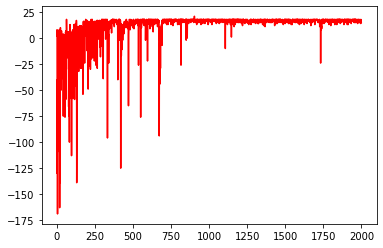

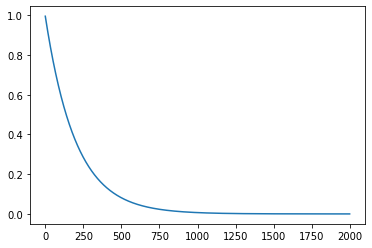

True

In [22]:
# grid world STOCHASTIC environment with Q-Learning Algorithm
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

import numpy as np




class GridWorld(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]

    def step(self, action):

        if action == 0:  
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[1] = min(self.current_pos[1] + 1, 4)
        if action == 1:
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[1] = max(self.current_pos[1] - 1, 0)
        if action == 2:
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[0] = max(self.current_pos[0] - 1, 0)
        if action == 3:
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[0] = min(self.current_pos[0] + 1,  4)



        done = self.current_pos == [4,4]
        agentman = np.zeros((5, 5));
        agentman[self.current_pos[0]][self.current_pos[1]] = 1;

        reward=-1

        if done:
            reward = reward + 13
            if (reward > 0):
                1 == 1
        else:
            if np.array_equal(self.current_pos, self.reward1_pos):
                self.reward1_pos=[5,5]
                reward += 4
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward2_pos):
                self.reward2_pos=[5,5]
                reward += 7
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward3_pos):
                self.reward3_pos=[5,5]
                reward += 6
                if (reward > 0):
                    1 == 1



            if np.array_equal(self.current_pos, self.reward5_pos):
                self.reward5_pos=[5,5]
                reward += 3
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.mosnter_pos):
                self.mosnter_pos=[5,5]
                reward = reward -3
                if (reward > 0):
                    1 == 1

        #print("->", reward, self.current_pos)
        return self.current_pos[0] * 5 + self.current_pos[1], reward, done, {}

    def reset(self):
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]
        #print("reset called", self.current_pos[0] * 5 + self.current_pos[1])
        return self.current_pos[0] * 5 + self.current_pos[1]


# hyperparameters
alpha = 0.2
gamma = 0.99
epsilon = 1
num_episodes = 2000


Q = np.zeros((25, 4))
tsteps=[]

env = GridWorld()
e=[]
for episode in range(num_episodes):
    epsilon=epsilon*0.995
    e.append(epsilon)
    state = env.reset()
    done = False
    timestep = 180
    temp_reward=0;
    while (timestep>0 and not done ):
        timestep -= 1
        
        if np.random.random() < epsilon:
            action = env.action_space.sample()  
        else:
            action = np.argmax(Q[state])  
       
        next_state, reward, done, _ = env.step(action)
        if done==True:
            1==1
        #check deubg--> >>
        Q[state][action] = (1 - alpha) * Q[state][action] + alpha * (reward + gamma * np.max(Q[next_state]))
        temp_reward=temp_reward+reward
       
        state = next_state

    #print("timestep", timestep)
    tsteps.append(temp_reward);
    #print("episode no", episode);
# Print Q-table
print(Q)
#print("TimeStep array",tsteps)
plt.plot(tsteps,color="red")
plt.show()
plt.plot(e)
plt.show()
with open('StocQL.pkl', 'wb') as f:  # open a text file
    pickle.dump(Q, f) 
1==1 #debugger mark

In [ ]:
with open('rl.pkl', 'rb') as f:
    Q = pickle.load(f) # deserialize using load()
    print(Q) # print student names

[[15.63089714 10.9353087  11.48051048 10.25530074]
 [17.28849553 10.86253637 10.30766256  8.81072225]
 [15.72667775 12.40515966 11.28304503 10.36215261]
 [12.91351461  9.81701384 10.1004186   9.78795057]
 [ 6.49544714  4.21769006  1.45888395 13.84962344]
 [ 9.33747578  9.27138214  9.31327139 13.3041256 ]
 [ 9.4304616  10.45025589  9.51337227  9.34107215]
 [ 9.96778987  9.76094819  9.82969732 10.78964384]
 [10.27225826  9.89733892 10.19569312 10.32659369]
 [ 9.16605013 10.26553853  8.3284138  15.07771218]
 [16.27277804  9.26060206  9.50022076  6.62645325]
 [10.61779919  9.39254243  9.38649476  9.1995146 ]
 [11.40995979  9.9526098   9.89757977 10.33914262]
 [10.48827353 10.47442157 10.6080628  10.69206923]
 [10.54742797 10.56381596 10.50294621 16.73357518]
 [ 5.88329254  4.84775361 10.00753843  5.50878247]
 [10.03162904  5.70269507  9.31220272  8.74923253]
 [11.18969228  9.94359898  9.95011875  9.68861251]
 [10.65514528 10.81714085 10.74423599 10.84173375]
 [10.95669158 10.49015705 10.97

[[34.40243364 23.47736185 22.80202114 20.89684997]
 [36.77013499 24.14376929 23.25270716 22.07060792]
 [33.10114646 22.10095671 22.00354544 21.85031308]
 [18.00453196 21.62832487 21.88390661 27.37489541]
 [ 1.27291488  4.34910543  1.37554316 23.54892816]
 [23.84172845 17.3630735   8.39884924 14.22715788]
 [20.73091697 21.04885211 22.54421059 21.56654944]
 [15.15119149 25.63626413 15.08023534 15.22938871]
 [22.32838768 20.05761298 20.07971938 29.67161153]
 [13.78990732 13.0180315  11.125219   26.19578505]
 [24.44764925  7.6400243  13.51127539  0.42919291]
 [20.92511816 18.82179818 20.93749138 17.85866904]
 [26.38432794 15.69232883 18.43525857 22.21527387]
 [31.99152679 21.81532549 23.11097709 23.0373349 ]
 [24.95226313 24.33973193 23.70858507 34.33487555]
 [ 5.6656229   0.8597751  11.36715186 -2.58298661]
 [22.52617555 -3.21122774  9.00357827  2.64196933]
 [28.45539808 13.35851857 18.74020084 17.63769653]
 [24.62721013 23.29597092 23.50788365 22.89595229]
 [22.62118499 23.98143363 23.80

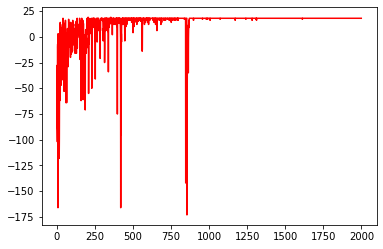

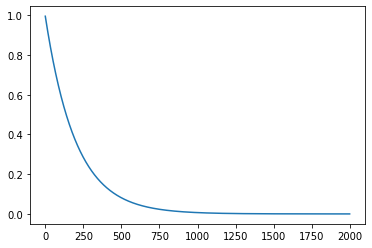

True

In [23]:
#determinticDQL
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

import numpy as np




class GridWorld(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]

    def step(self, action):

        if action == 0:
            self.current_pos[1] = min(self.current_pos[1] + 1, 4)
        elif action == 1:
            self.current_pos[1] = max(self.current_pos[1] - 1, 0)
        elif action == 2:
            self.current_pos[0] = max(self.current_pos[0] - 1, 0)
        elif action == 3:
            self.current_pos[0] = min(self.current_pos[0] + 1,  4)



        done = self.current_pos == [4,4]
        agentman = np.zeros((5, 5));
        agentman[self.current_pos[0]][self.current_pos[1]] = 1;

        reward=-1

        if done:
            reward = reward + 13
            if (reward > 0):
                1 == 1
        else:
            if np.array_equal(self.current_pos, self.reward1_pos):
                self.reward1_pos=[5,5]
                reward += 4
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward2_pos):
                self.reward2_pos=[5,5]
                reward += 7
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward3_pos):
                self.reward3_pos=[5,5]
                reward += 6
                if (reward > 0):
                    1 == 1



            if np.array_equal(self.current_pos, self.reward5_pos):
                self.reward5_pos=[5,5]
                reward += 3
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.mosnter_pos):
                self.mosnter_pos=[5,5]
                reward = reward -3
                if (reward > 0):
                    1 == 1

        #print("->", reward, self.current_pos)
        return self.current_pos[0] * 5 + self.current_pos[1], reward, done, {}

    def reset(self):
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]
        #print("reset called", self.current_pos[0] * 5 + self.current_pos[1])
        return self.current_pos[0] * 5 + self.current_pos[1]


# Hyperparameters for assignemnt
alpha = 0.2
gamma = 0.99
epsilon = 1
num_episodes = 2000

#tables
Q1 = np.zeros((25, 4))
Q2 = np.zeros((25, 4))
tsteps=[]
# The QL is runnin
env = GridWorld()
e=[]
for episode in range(num_episodes):
    epsilon=epsilon*0.995
    e.append(epsilon)
    state = env.reset()
    done = False
    timestep = 180
    temp_reward=0;
    while (timestep>0 and not done ):
        timestep -= 1
        
        if np.random.random() < epsilon:
            action = env.action_space.sample()  
        else:
            Q = Q1 + Q2
            action = np.argmax(Q[state]) 

        
        next_state, reward, done, _ = env.step(action)
        if done==True:
            1==1
  
        if np.random.random() < 0.5:
            Q1[state][action] = (1 - alpha) * Q1[state][action] + alpha * (reward + gamma * np.max(Q1[next_state]))
        else:
          
            Q2[state][action] = (1 - alpha) * Q2[state][action] + alpha * (reward + gamma * Q2[next_state][np.argmax(Q2[next_state])])


        temp_reward=temp_reward+reward
       
        state = next_state

    #print("timestep", timestep)
    tsteps.append(temp_reward);
    #print("episode no", episode);
Temp=tsteps
print(Q1+Q2)
with open('determinDoubleQL.pkl', 'wb') as f:  # open a text file
    pickle.dump(Q1+Q2, f) 
#print("TimeStep array",tsteps)
plt.plot(tsteps,color="red")
plt.show()
plt.plot(e)
plt.show()
1==1

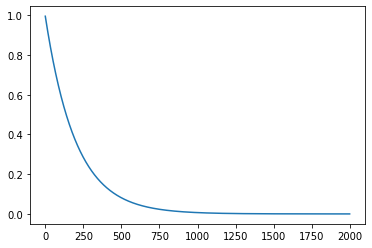

In [ ]:
plt.plot(e)
plt.show()

[[31.70823517 19.63123915 19.4830541  19.2541261 ]
 [34.5831124  21.46957877 20.52575788 20.64302431]
 [31.26070458 20.12985271 20.24885446 18.39506057]
 [20.10472433 20.04122235 19.14255325 25.74531972]
 [11.73838416 13.49368709 12.09740821 25.04663821]
 [20.99205717  6.75856969  4.54136537  4.31935834]
 [16.81540226 16.63648606 23.98730628 20.7826461 ]
 [21.44209851 14.13295892 14.16703966 15.85658256]
 [21.76894152 18.33660548 20.00692541 27.81989209]
 [21.795984   21.83228646 21.27066452 22.61445364]
 [16.53937965  1.291906    4.31942821 -5.54869564]
 [18.89366822  9.70667294 20.68505814 11.24790944]
 [21.31873236 16.64370531 13.36013288 16.80302113]
 [23.15052943 19.25766397 19.87686277 30.7676979 ]
 [22.69566268 21.91382943 22.7696361  23.01777305]
 [ 1.12553135 -3.01498479 -1.80156617 -3.29406525]
 [16.26648604 -5.22238619  4.66738234  2.84584112]
 [24.01822152  5.52209628  7.91508262  9.37466773]
 [33.44211826 20.0729353  20.94100501 21.6423635 ]
 [22.12820607 22.52068071 22.53

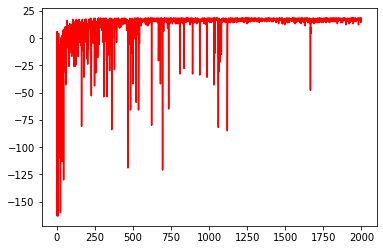

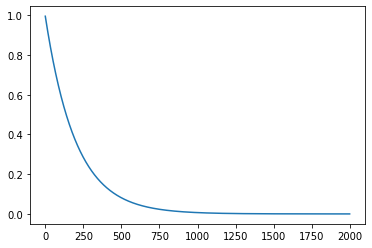

True

In [25]:
#StochasticDQL
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

import numpy as np


class GridWorld(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]

    def step(self, action):

        if action == 0:  
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[1] = min(self.current_pos[1] + 1, 4)
        if action == 1:
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[1] = max(self.current_pos[1] - 1, 0)
        if action == 2:
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[0] = max(self.current_pos[0] - 1, 0)
        if action == 3:
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[0] = min(self.current_pos[0] + 1, 4)



        done = self.current_pos == [4,4]
        agentman = np.zeros((5, 5));
        agentman[self.current_pos[0]][self.current_pos[1]] = 1;

        reward=-1

        if done:
            reward = reward + 13
            if (reward > 0):
                1 == 1
        else:
            if np.array_equal(self.current_pos, self.reward1_pos):
                self.reward1_pos=[5,5]
                reward += 4
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward2_pos):
                self.reward2_pos=[5,5]
                reward += 7
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward3_pos):
                self.reward3_pos=[5,5]
                reward += 6
                if (reward > 0):
                    1 == 1



            if np.array_equal(self.current_pos, self.reward5_pos):
                self.reward5_pos=[5,5]
                reward += 3
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.mosnter_pos):
                self.mosnter_pos=[5,5]
                reward = reward -3
                if (reward > 0):
                    1 == 1

        return self.current_pos[0] * 5 + self.current_pos[1], reward, done, {}

    def reset(self):
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]
        return self.current_pos[0] * 5 + self.current_pos[1]


alpha = 0.2
gamma = 0.99
epsilon = 1
num_episodes = 2000

Q1 = np.zeros((25, 4))
Q2 = np.zeros((25, 4))
tsteps=[]
# ql started
env = GridWorld()
e=[]
for episode in range(num_episodes):
    epsilon=epsilon*0.995
    e.append(epsilon)
    state = env.reset()
    done = False
    timestep = 180
    temp_reward=0;
    while (timestep>0 and not done ):
        timestep -= 1
       
        if np.random.random() < epsilon:
            action = env.action_space.sample()  
        else:
            Q = Q1 + Q2
            action = np.argmax(Q[state])  

        
        next_state, reward, done, _ = env.step(action)
        if done==True:
            1==1
        
        if np.random.random() < 0.5:
            Q1[state][action] = (1 - alpha) * Q1[state][action] + alpha * (reward + gamma * np.max(Q1[next_state]))
        else:
            
            Q2[state][action] = (1 - alpha) * Q2[state][action] + alpha * (reward + gamma * Q2[next_state][np.argmax(Q2[next_state])])


        temp_reward=temp_reward+reward
       
        state = next_state

    
    tsteps.append(temp_reward);
    

print(Q1+Q2)
with open('StocDQL.pkl', 'wb') as f:  # open a text file
    pickle.dump(Q, f) 

plt.plot(tsteps,color="red")
plt.show()
plt.plot(e)
plt.show()
1==1

In [ ]:
# comparing determinsitcs
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

import numpy as np



class GridWorld(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]

    def step(self, action):

        if action == 0:
            self.current_pos[1] = min(self.current_pos[1] + 1, 4)
        elif action == 1:
            self.current_pos[1] = max(self.current_pos[1] - 1, 0)
        elif action == 2:
            self.current_pos[0] = max(self.current_pos[0] - 1, 0)
        elif action == 3:
            self.current_pos[0] = min(self.current_pos[0] + 1,  4)



        done = self.current_pos == [4,4]
        agentman = np.zeros((5, 5));
        agentman[self.current_pos[0]][self.current_pos[1]] = 1;

        reward=-1

        if done:
            reward = reward + 13
            if (reward > 0):
                1 == 1
        else:
            if np.array_equal(self.current_pos, self.reward1_pos):
                self.reward1_pos=[5,5]
                reward += 4
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward2_pos):
                self.reward2_pos=[5,5]
                reward += 7
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward3_pos):
                self.reward3_pos=[5,5]
                reward += 6
                if (reward > 0):
                    1 == 1



            if np.array_equal(self.current_pos, self.reward5_pos):
                self.reward5_pos=[5,5]
                reward += 3
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.mosnter_pos):
                self.mosnter_pos=[5,5]
                reward = reward -3
                if (reward > 0):
                    1 == 1

        #print("->", reward, self.current_pos)
        return self.current_pos[0] * 5 + self.current_pos[1], reward, done, {}

    def reset(self):
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]
        #print("reset called", self.current_pos[0] * 5 + self.current_pos[1])
        return self.current_pos[0] * 5 + self.current_pos[1]



alpha = 0.2
gamma = 0.99
epsilon = 1
num_episodes = 2000


Q = np.zeros((25, 4))
tsteps=[]

env = GridWorld()
e=[]
for episode in range(num_episodes):
    epsilon=epsilon*0.995
    e.append(epsilon)
    state = env.reset()
    done = False
    timestep = 180
    temp_reward=0;
    while (timestep>0 and not done ):
        timestep -= 1
        if np.random.random() < epsilon:
            action = env.action_space.sample() 
        else:
            action = np.argmax(Q[state]) 

        
        next_state, reward, done, _ = env.step(action)
        if done==True:
            1==1
        
        Q[state][action] = (1 - alpha) * Q[state][action] + alpha * (reward + gamma * np.max(Q[next_state]))
        temp_reward=temp_reward+reward
        state = next_state

    #print("timestep", timestep)
    tsteps.append(temp_reward);
    #print("episode no", episode);

print(Q)
#print("TimeStep array",tsteps)

with open('rl.pkl', 'wb') as f:  # open a text file
    pickle.dump(Q, f) 
1==1

[[10.42718233 13.76735262 13.72290016 16.90089986]
 [12.63838216  9.97712976  9.98823525 10.02680944]
 [12.59559747 10.42261059 10.36174617 10.14414044]
 [10.34585734 10.40479225 10.39117189 11.58942301]
 [ 9.84906171  9.97273146  9.90625745 10.98878126]
 [10.01458188 13.70775337 11.87498137 18.08171703]
 [ 9.95756835  9.82590742 10.09107895 12.27281955]
 [11.61264008 10.20694429 10.33686003 10.60176004]
 [10.89470372 10.29091797 10.89259233 14.35946883]
 [11.28638894 10.43330734 10.49659985 12.30906396]
 [19.27446165 14.39205443 13.72452348  4.47006866]
 [13.40854712 11.49259945 10.32906217 10.18394156]
 [14.554088   11.36632986 10.08936392 11.45560765]
 [11.86365025 12.07118368 12.15579169 15.7112    ]
 [11.67367494 13.06561797 11.20500192 12.12640071]
 [ 9.66258232  3.29446986  6.41022192 -0.69670902]
 [12.38758328  3.24598142 10.03169671  7.26942573]
 [15.16498438  9.4938685  10.72642456  9.27235362]
 [16.88       12.25544708 12.11017587 10.87920746]
 [11.07984392 11.88047864 11.88

True

[[ 8.60035471  8.56284144  8.57434748  8.60695046]
 [ 9.97556791  9.19611958  9.0682013   8.98925573]
 [ 8.75459041  8.6121241   8.54873349  8.66967866]
 [ 8.93701486  8.86263548  8.89705969  8.99593488]
 [ 9.61290123  9.591266    9.5862724   9.39371041]
 [ 9.10286648  9.23290462  9.17814744  9.28998382]
 [ 9.27594356  9.36159779  9.19407846  9.32085517]
 [ 9.12625843  9.22203213  9.04597065  9.06343123]
 [ 9.4392159   9.41810092  9.35480981  9.83432846]
 [10.04083079  9.90426399  9.89612566 10.38004543]
 [10.22283007  9.6247529   9.66423615  8.12976988]
 [ 9.34377967  9.35906883  9.38468714  9.41615474]
 [ 9.96340509  9.68476756  9.7156241   9.54623088]
 [12.23982905 10.01757954 10.08312103  9.92843286]
 [10.12458774 10.1227098  10.12849335 15.22156787]
 [10.74267198 10.29877299 10.55456674  9.55649267]
 [ 9.82853914  9.33057474  9.97131932 10.01794391]
 [ 9.96731406  9.9496914   9.91274822 10.03612435]
 [10.42677379 10.45798797 10.07616523 10.74865602]
 [10.34832544 10.2724065  10.23

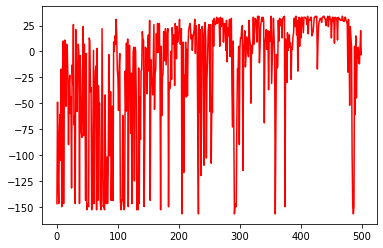

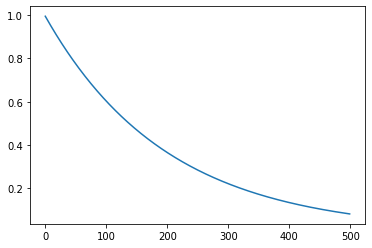

True

In [ ]:
#Reward Fuction
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

import numpy as np




class GridWorld(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]

    def step(self, action):

        if action == 0:  # move right
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[1] = min(self.current_pos[1] + 1, 4)
        if action == 1:
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[1] = max(self.current_pos[1] - 1, 0)
        if action == 2:
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[0] = max(self.current_pos[0] - 1, 0)
        if action == 3:
            if (np.random.random() < 0.15):
                pass
            else:
                self.current_pos[0] = min(self.current_pos[0] + 1,  4)



        done = self.current_pos == [4,4]
        agentman = np.zeros((5, 5));
        agentman[self.current_pos[0]][self.current_pos[1]] = 1;

        reward=-1

        if done:
            reward = reward + 13
            if (reward > 0):
                1 == 1
        else:
            if np.array_equal(self.current_pos, self.reward1_pos):
                self.reward1_pos=[5,5]
                reward += 20
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward2_pos):
                self.reward2_pos=[5,5]
                reward += 7
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward3_pos):
                self.reward3_pos=[5,5]
                reward += 6
                if (reward > 0):
                    1 == 1



            if np.array_equal(self.current_pos, self.reward5_pos):
                self.reward5_pos=[5,5]
                reward += 3
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.mosnter_pos):
                self.mosnter_pos=[5,5]
                reward = reward -3
                if (reward > 0):
                    1 == 1

        #print("->", reward, self.current_pos)
        return self.current_pos[0] * 5 + self.current_pos[1], reward, done, {}

    def reset(self):
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]
        #print("reset called", self.current_pos[0] * 5 + self.current_pos[1])
        return self.current_pos[0] * 5 + self.current_pos[1]


# Define hyperparameters
alpha = 0.2
gamma = 0.99
epsilon = 1
num_episodes = 500


Q = np.zeros((25, 4))
tsteps=[]

env = GridWorld()
e=[]
for episode in range(num_episodes):
    epsilon=epsilon*0.995
    e.append(epsilon)
    state = env.reset()
    done = False
    timestep = 180
    temp_reward=0;
    while (timestep>0 and not done ):
        timestep -= 1
        # Select action
        if np.random.random() < epsilon:
            action = env.action_space.sample()  # explore
        else:
            action = np.argmax(Q[state])  # exploit

        # Take action and observe next state and reward
        next_state, reward, done, _ = env.step(action)
        if done==True:
            1==1
        # Update Q-table
        Q[state][action] = (1 - alpha) * Q[state][action] + alpha * (reward + gamma * np.max(Q[next_state]))
        temp_reward=temp_reward+reward
        # Update state
        state = next_state

    #print("timestep", timestep)
    tsteps.append(temp_reward);
    #print("episode no", episode);
# Print Q-table
print(Q)
#print("TimeStep array",tsteps)
plt.plot(tsteps,color="red")
plt.show()
plt.plot(e)
plt.show()
with open('rl.pkl', 'wb') as f:  # open a text file
    pickle.dump(Q, f) 
1==1 #debugger mark

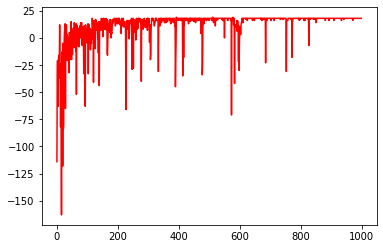

True

In [ ]:
# grid world DETERMINISTIC environment with Q-Learning Algorithm
#hyperparameter tuning
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

import numpy as np



class GridWorld(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]

    def step(self, action):

        if action == 0:
            self.current_pos[1] = min(self.current_pos[1] + 1, 4)
        elif action == 1:
            self.current_pos[1] = max(self.current_pos[1] - 1, 0)
        elif action == 2:
            self.current_pos[0] = max(self.current_pos[0] - 1, 0)
        elif action == 3:
            self.current_pos[0] = min(self.current_pos[0] + 1,  4)



        done = self.current_pos == [4,4]
        agentman = np.zeros((5, 5));
        agentman[self.current_pos[0]][self.current_pos[1]] = 1;

        reward=-1

        if done:
            reward = reward + 13
            if (reward > 0):
                1 == 1
        else:
            if np.array_equal(self.current_pos, self.reward1_pos):
                self.reward1_pos=[5,5]
                reward += 4
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward2_pos):
                self.reward2_pos=[5,5]
                reward += 7
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward3_pos):
                self.reward3_pos=[5,5]
                reward += 6
                if (reward > 0):
                    1 == 1



            if np.array_equal(self.current_pos, self.reward5_pos):
                self.reward5_pos=[5,5]
                reward += 3
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.mosnter_pos):
                self.mosnter_pos=[5,5]
                reward = reward -3
                if (reward > 0):
                    1 == 1

        #print("->", reward, self.current_pos)
        return self.current_pos[0] * 5 + self.current_pos[1], reward, done, {}

    def reset(self):
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]
        #print("reset called", self.current_pos[0] * 5 + self.current_pos[1])
        return self.current_pos[0] * 5 + self.current_pos[1]



alpha = 0.1
gamma = 0.99
epsilon = 1
num_episodes = 1000


Q = np.zeros((25, 4))
tsteps=[]

env = GridWorld()
e=[]
for episode in range(num_episodes):
    epsilon=epsilon*0.995
    e.append(epsilon)
    state = env.reset()
    done = False
    timestep = 180
    temp_reward=0;
    while (timestep>0 and not done ):
        timestep -= 1
        if np.random.random() < epsilon:
            action = env.action_space.sample() 
        else:
            action = np.argmax(Q[state]) 

        
        next_state, reward, done, _ = env.step(action)
        if done==True:
            1==1
        
        Q[state][action] = (1 - alpha) * Q[state][action] + alpha * (reward + gamma * np.max(Q[next_state]))
        temp_reward=temp_reward+reward
        state = next_state

    #print("timestep", timestep)
    tsteps.append(temp_reward);
    #print("episode no", episode);

#print("TimeStep array",tsteps)

plt.plot(tsteps,color="red")
plt.show()
with open('rl.pkl', 'wb') as f:  # open a text file
    pickle.dump(Q, f) 
1==1

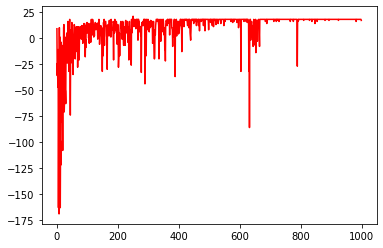

True

In [ ]:
# grid world DETERMINISTIC environment with Q-Learning Algorithm
#hyperparameter tuning -- timestep
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

import numpy as np



class GridWorld(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]

    def step(self, action):

        if action == 0:
            self.current_pos[1] = min(self.current_pos[1] + 1, 4)
        elif action == 1:
            self.current_pos[1] = max(self.current_pos[1] - 1, 0)
        elif action == 2:
            self.current_pos[0] = max(self.current_pos[0] - 1, 0)
        elif action == 3:
            self.current_pos[0] = min(self.current_pos[0] + 1,  4)



        done = self.current_pos == [4,4]
        agentman = np.zeros((5, 5));
        agentman[self.current_pos[0]][self.current_pos[1]] = 1;

        reward=-1

        if done:
            reward = reward + 13
            if (reward > 0):
                1 == 1
        else:
            if np.array_equal(self.current_pos, self.reward1_pos):
                self.reward1_pos=[5,5]
                reward += 4
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward2_pos):
                self.reward2_pos=[5,5]
                reward += 7
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward3_pos):
                self.reward3_pos=[5,5]
                reward += 6
                if (reward > 0):
                    1 == 1



            if np.array_equal(self.current_pos, self.reward5_pos):
                self.reward5_pos=[5,5]
                reward += 3
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.mosnter_pos):
                self.mosnter_pos=[5,5]
                reward = reward -3
                if (reward > 0):
                    1 == 1

        #print("->", reward, self.current_pos)
        return self.current_pos[0] * 5 + self.current_pos[1], reward, done, {}

    def reset(self):
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]
        #print("reset called", self.current_pos[0] * 5 + self.current_pos[1])
        return self.current_pos[0] * 5 + self.current_pos[1]



alpha = 0.1
gamma = 0.99
epsilon = 1
num_episodes = 1000


Q = np.zeros((25, 4))
tsteps=[]

env = GridWorld()
e=[]
for episode in range(num_episodes):
    epsilon=epsilon*0.995
    e.append(epsilon)
    state = env.reset()
    done = False
    timestep = 180
    temp_reward=0;
    while (timestep>0 and not done ):
        timestep -= 1
        if np.random.random() < epsilon:
            action = env.action_space.sample() 
        else:
            action = np.argmax(Q[state]) 

        
        next_state, reward, done, _ = env.step(action)
        if done==True:
            1==1
        
        Q[state][action] = (1 - alpha) * Q[state][action] + alpha * (reward + gamma * np.max(Q[next_state]))
        temp_reward=temp_reward+reward
        state = next_state

    #print("timestep", timestep)
    tsteps.append(temp_reward);
    #print("episode no", episode);

#print("TimeStep array",tsteps)

plt.plot(tsteps,color="red")
plt.show()
with open('rl.pkl', 'wb') as f:  # open a text file
    pickle.dump(Q, f) 
1==1

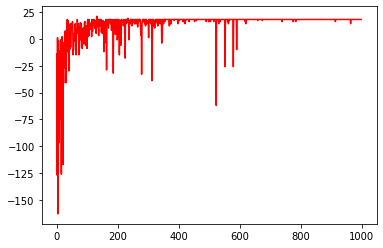

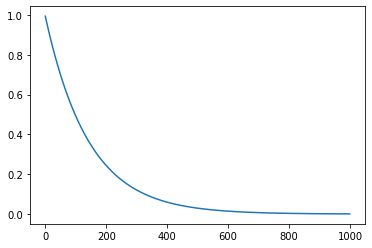

True

In [ ]:
# grid world DETERMINISTIC environment with Q-Learning Algorithm
#hyperparameter tuning -- epsilon decay
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

import numpy as np



class GridWorld(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(25)
        self.action_space = spaces.Discrete(4)
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]

    def step(self, action):

        if action == 0:
            self.current_pos[1] = min(self.current_pos[1] + 1, 4)
        elif action == 1:
            self.current_pos[1] = max(self.current_pos[1] - 1, 0)
        elif action == 2:
            self.current_pos[0] = max(self.current_pos[0] - 1, 0)
        elif action == 3:
            self.current_pos[0] = min(self.current_pos[0] + 1,  4)



        done = self.current_pos == [4,4]
        agentman = np.zeros((5, 5));
        agentman[self.current_pos[0]][self.current_pos[1]] = 1;

        reward=-1

        if done:
            reward = reward + 13
            if (reward > 0):
                1 == 1
        else:
            if np.array_equal(self.current_pos, self.reward1_pos):
                self.reward1_pos=[5,5]
                reward += 4
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward2_pos):
                self.reward2_pos=[5,5]
                reward += 7
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.reward3_pos):
                self.reward3_pos=[5,5]
                reward += 6
                if (reward > 0):
                    1 == 1



            if np.array_equal(self.current_pos, self.reward5_pos):
                self.reward5_pos=[5,5]
                reward += 3
                if (reward > 0):
                    1 == 1

            if np.array_equal(self.current_pos, self.mosnter_pos):
                self.mosnter_pos=[5,5]
                reward = reward -3
                if (reward > 0):
                    1 == 1

        #print("->", reward, self.current_pos)
        return self.current_pos[0] * 5 + self.current_pos[1], reward, done, {}

    def reset(self):
        self.current_pos = [0, 0]
        self.reward1_pos = [0, 3]
        self.reward2_pos = [2, 1]
        self.reward3_pos = [3, 4]
        self.reward4_pos = [4, 4]
        self.reward5_pos = [0, 2]
        self.mosnter_pos = [3, 0]
        #print("reset called", self.current_pos[0] * 5 + self.current_pos[1])
        return self.current_pos[0] * 5 + self.current_pos[1]



alpha = 0.1
gamma = 0.99
epsilon = 1
num_episodes = 1000


Q = np.zeros((25, 4))
tsteps=[]

env = GridWorld()
e=[]
for episode in range(num_episodes):
    epsilon=epsilon*0.993
    e.append(epsilon)
    state = env.reset()
    done = False
    timestep = 180
    temp_reward=0;
    while (timestep>0 and not done ):
        timestep -= 1
        if np.random.random() < epsilon:
            action = env.action_space.sample() 
        else:
            action = np.argmax(Q[state]) 

        
        next_state, reward, done, _ = env.step(action)
        if done==True:
            1==1
        
        Q[state][action] = (1 - alpha) * Q[state][action] + alpha * (reward + gamma * np.max(Q[next_state]))
        temp_reward=temp_reward+reward
        state = next_state

    #print("timestep", timestep)
    tsteps.append(temp_reward);
    #print("episode no", episode);

#print("TimeStep array",tsteps)

plt.plot(tsteps,color="red")
plt.show()
plt.plot(e)
plt.show()

with open('rl.pkl', 'wb') as f:  # open a text file
    pickle.dump(Q, f) 
1==1

[[1752.3226150488586, 981.4102107826678, 988.3031592471135], [1551.0996470303285, 1495.8971070886278, 1769.0127504685697], [1341.9496400538364, 896.8017281258691, 889.0859794559866], [1285.3938021669567, 1169.3075140661535, 1732.2409048035654]]
TimeStep array [-462.28099762185667, -578.7264086099183, -498.303245732312, -480.31415036708853, -554.113081076456, -426.6805331708448, -533.2280701600722, -499.89488744196177, -584.0163930457479, -478.0957262329396, -513.9726769134968, -341.0387515239112, -636.791832706911, -372.37653829201133, -507.49235615853365, -412.4609645632385, -506.1713989795258, -572.5503416227621, -547.5076095304802, -319.75048522978074, -337.133052839505, -448.6734545029781, -426.3627382964305, -364.14507042829706, -528.0810661231735, -296.95224316255764, -512.2767551018902, -479.51461180711067, -523.2166625532834, -402.52446895656215, -355.07096076941946, -387.6258483907272, -613.6761313074129, -468.8700205647897, -449.6919593563258, -612.4075990757699, -310.5519140

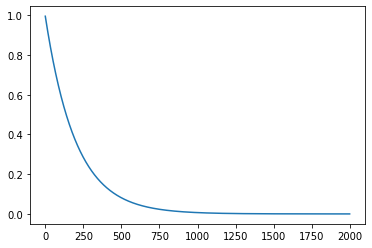

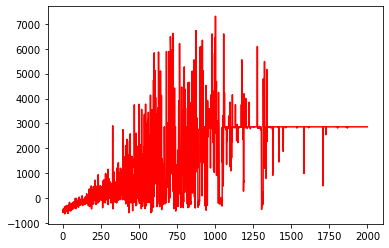

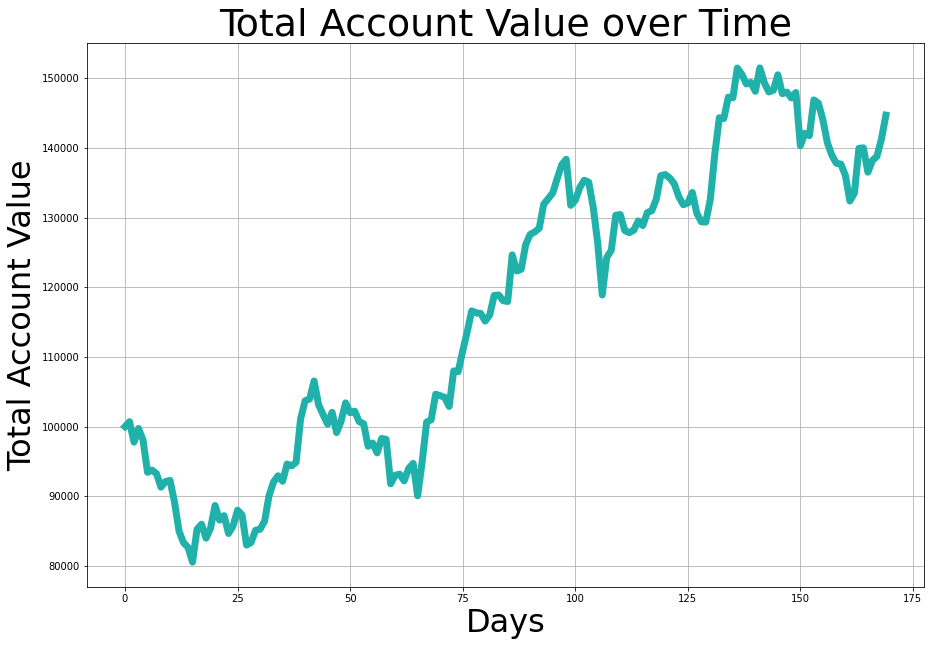

In [10]:
# Imports
import gymnasium
from gymnasium import spaces
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Defining the Stock Trading Environment.
"""DON'T MAKE ANY CHANGES TO THE ENVIRONMENT."""


class StockTradingEnvironment(gymnasium.Env):
    """This class implements the Stock Trading environment."""

    def __init__(self, file_path, train=True, number_of_days_to_consider=10):
        """This method initializes the environment.

        :param file_path: - Path of the CSV file containing the historical stock data.
        :param train: - Boolean indicating whether the goal is to train or test the performance of the agent.
        :param number_of_days_to_consider = Integer representing the number of days the for which the agent
                considers the trend in stock price to make a decision."""

        self.file_path = file_path
        self.stock_data = pd.read_csv(self.file_path)
        self.train = train

        # Splitting the data into train and test datasets.
        self.training_stock_data = self.stock_data.iloc[:int(0.8 * len(self.stock_data))]
        self.testing_stock_data = self.stock_data.iloc[int(0.8 * len(self.stock_data)):].reset_index()

        self.observation_space = spaces.Discrete(4)
        self.action_space = spaces.Discrete(3)

        self.investment_capital = 100000  # This defines the investment capital that the agent starts with.
        self.number_of_shares = 0  # This defines number of shares currently held by the agent.
        self.stock_value = 0  # This defines the value of the stock currently held by the agent.
        self.book_value = 0  # This defines the total value for which the agent bought the shares.
        # This defines the agent's total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # List to store the total account value over training or evaluation.
        self.total_account_value_list = []
        # This defines the number of days for which the agent considers the data before taking an action.
        self.number_of_days_to_consider = number_of_days_to_consider
        # The maximum timesteps the agent will take before the episode ends.
        if self.train:
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider
        else:
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider
        # Initializing the number of steps taken to 0.
        self.timestep = 0
        self.reset()

    def reset(self):
        """This method resets the environment and returns the observation.

        :returns observation: - Integer in the range of 0 to 3 representing the four possible observations that the
                                agent can receive. The observation depends upon whether the price increased on average
                                in the number of days the agent considers, and whether the agent already has the stock
                                or not.

                 info: - info: - A dictionary that can be used to provide additional implementation information."""

        self.investment_capital = 100000  # This defines the investment capital that the agent starts with.
        self.number_of_shares = 0  # This defines number of shares currently held by the agent.
        self.stock_value = 0  # This defines the value of the stock currently held by the agent.
        self.book_value = 0  # This defines the total value for which the agent bought the shares.
        # This defines the agent's total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # List to store the total account value over training or evaluation.
        self.total_account_value_list = []
        # Initializing the number of steps taken to 0.
        self.timestep = 0

        # Getting the observation vector.
        if self.train:
            # If the task is to train the agent the maximum timesteps will be equal to the number of days considered
            # subtracted from the  length of the training stock data.
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.training_stock_data['Close'][self.timestep + 1 + i] \
                        - self.training_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            stock_held = False

            # Observation vector that will be passed to the agent.
            observation = [price_increase, stock_held]

        else:
            # If the task is to evaluate the trained agent's performance the maximum timesteps will be equal to the
            # number of days considered subtracted from the  length of the testing stock data.
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.testing_stock_data['Close'][self.timestep + 1 + i] \
                        - self.testing_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            stock_held = False

            # Observation vector.
            observation = [price_increase, stock_held]

        if np.array_equal(observation, [True, False]):
            observation = 0
        if np.array_equal(observation, [True, True]):
            observation = 1
        if np.array_equal(observation, [False, False]):
            observation = 2
        if np.array_equal(observation, [False, True]):
            observation = 3

        info = None

        return observation, info

    def step(self, action):
        """This method implements what happens when the agent takes the action to Buy/Sell/Hold.

        :param action: - Integer in the range 0 to 2 inclusive.

        :returns observation: - Integer in the range of 0 to 3 representing the four possible observations that the
                                agent can receive. The observation depends upon whether the price increased on average
                                in the number of days the agent considers, and whether the agent already has the stock
                                or not.
                 reward: - Integer/Float value that's used to measure the performance of the agent.
                 terminated: - Boolean describing whether the episode has terminated.
                 truncated: - Boolean describing whether a truncation condition outside the scope of the MDP is satisfied.
                 info: - A dictionary that can be used to provide additional implementation information."""

        # We give the agent a penalty for taking actions such as buying a stock when the agent doesn't have the
        # investment capital and selling a stock when the agent doesn't have any shares.
        penalty = 0

        if self.train:
            if action == 0:  # Buy
                if self.number_of_shares > 0:
                    penalty = -10
                # Determining the number of shares the agent can buy.
                number_of_shares_to_buy = math.floor(self.investment_capital / self.training_stock_data[
                    'Open'][self.timestep + self.number_of_days_to_consider])
                # Adding to the number of shares the agent has.
                self.number_of_shares += number_of_shares_to_buy

                # Computing the stock value, book value, investment capital and reward.
                if number_of_shares_to_buy > 0:
                    self.stock_value +=\
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.book_value += \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider]\
                        * number_of_shares_to_buy
                    self.investment_capital -= \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy

                    reward = 1 + penalty

                else:
                    # Computing the stock value and reward.
                    self.stock_value = \
                        self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * self.number_of_shares
                    reward = -10

            if action == 1:  # Sell
                # Computing the investment capital, sell value and reward.
                self.investment_capital += \
                    self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                    * self.number_of_shares
                sell_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                             * self.number_of_shares

                if self.book_value > 0:
                    reward = (sell_value - self.book_value) / self.book_value * 100
                else:
                    reward = -10

                self.number_of_shares = 0
                self.stock_value = 0
                self.book_value = 0

            if action == 2:  # Hold
                # Computing the stock value and reward.
                self.stock_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                                   * self.number_of_shares

                if self.book_value > 0:
                    reward = (self.stock_value - self.book_value) / self.book_value * 100
                else:
                    reward = -1

        else:
            if action == 0:  # Buy
                if self.number_of_shares > 0:
                    penalty = -10
                # Determining the number of shares the agent can buy.
                number_of_shares_to_buy = math.floor(self.investment_capital / self.testing_stock_data[
                    'Open'][self.timestep + self.number_of_days_to_consider])
                # Adding to the number of shares the agent has.
                self.number_of_shares += number_of_shares_to_buy

                # Computing the stock value, book value, investment capital and reward.
                if number_of_shares_to_buy > 0:
                    self.stock_value += \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.book_value += \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy
                    self.investment_capital -= \
                        self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                        * number_of_shares_to_buy

                    reward = 1 + penalty

                else:
                    # Computing the stock value and reward.
                    self.stock_value = self.training_stock_data['Open'][
                                           self.timestep + self.number_of_days_to_consider] * self.number_of_shares
                    reward = -10

            if action == 1:  # Sell
                # Computing the investment capital, sell value and reward.
                self.investment_capital += \
                    self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                    * self.number_of_shares
                sell_value = self.training_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                             * self.number_of_shares

                if self.book_value > 0:
                    reward = (sell_value - self.book_value) / self.book_value * 100
                else:
                    reward = -10

                self.number_of_shares = 0
                self.stock_value = 0
                self.book_value = 0

            if action == 2:  # Hold
                # Computing the stock value and reward.
                self.stock_value = self.testing_stock_data['Open'][self.timestep + self.number_of_days_to_consider] \
                                   * self.number_of_shares

                if self.book_value > 0:
                    reward = (self.stock_value - self.book_value) / self.book_value * 100
                else:
                    reward = -1

        # Determining if the agent currently has shares of the stock or not.
        if self.number_of_shares > 0:
            stock_held = True
        else:
            stock_held = False

        # Getting the observation vector.
        if self.train:
            # If the task is to train the agent the maximum timesteps will be equal to the number of days considered
            # subtracted from the  length of the training stock data.
            self.max_timesteps = len(self.training_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.training_stock_data['Close'][self.timestep + 1 + i] \
                        - self.training_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            # Observation vector.
            observation = [price_increase, stock_held]

        else:
            # If the task is to evaluate the trained agent's performance the maximum timesteps will be equal to the
            # number of days considered subtracted from the  length of the testing stock data.
            self.max_timesteps = len(self.testing_stock_data) - self.number_of_days_to_consider

            # Calculating whether the price increased or decreased/remained the same on the majority of days the agent
            # considers.
            price_increase_list = []
            for i in range(self.number_of_days_to_consider):
                if self.testing_stock_data['Close'][self.timestep + 1 + i] \
                        - self.testing_stock_data['Close'][self.timestep + i] > 0:
                    price_increase_list.append(1)
                else:
                    price_increase_list.append(0)

            if (np.sum(price_increase_list) / self.number_of_days_to_consider) >= 0.5:
                price_increase = True
            else:
                price_increase = False

            # Observation vector.
            observation = [price_increase, stock_held]

        self.timestep += 1  # Increasing the number of steps taken by the agent by 1.

        if np.array_equal(observation, [True, False]):
            observation = 0
        if np.array_equal(observation, [True, True]):
            observation = 1
        if np.array_equal(observation, [False, False]):
            observation = 2
        if np.array_equal(observation, [False, True]):
            observation = 3

        # Computing the total account value.
        self.total_account_value = self.investment_capital + self.stock_value
        # Appending the total account value of the list to plot the graph.
        self.total_account_value_list.append(self.total_account_value)

        # The episode terminates when the maximum timesteps have been reached.
        terminated = True if (self.timestep >= self.max_timesteps) \
            else False
        truncated = False
        info = {}

        return observation, reward, terminated, truncated, info

    def render(self, mode='human'):
        """This method renders the agent's total account value over time.

        :param mode: 'human' renders to the current display or terminal and returns nothing."""

        plt.figure(figsize=(15, 10))
        plt.plot(self.total_account_value_list, color='lightseagreen', linewidth=7)
        plt.xlabel('Days', fontsize=32)
        plt.ylabel('Total Account Value', fontsize=32)
        plt.title('Total Account Value over Time', fontsize=38)
        plt.grid()
        plt.show()

        # NOTE: You can adjust the parameter 'number_of_days_to_consider'

stock_trading_environment = StockTradingEnvironment('./NVDA(1).csv', number_of_days_to_consider=10)

# Define hyperparameters
alpha = 0.125
gamma = 0.99
epsilon = 1
num_episodes = 2000


# Initialize Q-table
Q = [[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
tsteps=[]
# Run Q-learning algorithm
env = StockTradingEnvironment('./NVDA(1).csv', number_of_days_to_consider=10)
e=[]
for episode in range(num_episodes):
    epsilon=epsilon*0.995
    e.append(epsilon)
    state,inf = env.reset()
    done = False
    timestep = 170
    temp_reward=0;
    while (timestep>0 and not done ):
        timestep -= 1
        # Select action
        if np.random.random() < epsilon:
            action = env.action_space.sample()  # explore
        else:
            action = np.argmax(Q[state])  # exploit

        # Take action and observe next state and reward
        next_state, reward, done, _ ,info = env.step(action)
        if done==True:
            1==1
        # Update Q-table
        Q[state][action] = (1 - alpha) * Q[state][action] + alpha * (reward + gamma * np.max(Q[next_state]))
        temp_reward=temp_reward+reward
        # Update state
        state = next_state

    #print("timestep", timestep)
    tsteps.append(temp_reward);
    #print("episode no", episode);
# Print Q-table
print(Q)
print("TimeStep array",tsteps)
plt.plot(e)
plt.show()
plt.plot(tsteps,color="red")
plt.show()
env.render()